# Tool for implantation of ionised noble gases into dust grains

In [1]:
import numpy as np

# import function repository
%load_ext autoreload
%autoreload 2
from function_repository import *


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
%matplotlib nbagg

# First Task: Reproduce Figure 2 of Verchovsky et al. 2003 PASA : 
# Single grain model

# Concentration vs D/S ratio (D = grain diameter; S = implantation range)

In [2]:
# setting input quantities

# vectors
step = 0.1
grain_d         = np.arange(0.1,17.1,step) # micrometers
s               = grain_d                  # micrometers 
ratio_grain_d_s = np.arange(min(grain_d)/max(s),max(grain_d)/min(s),step) # dimensionless

# and matrix defined
grain_d_grid, s_grid = np.meshgrid(grain_d, s)

# fluence
fluence       = 1000. # this is just not crucial, it is scaled since I look at normalized concentrations. To check


In [3]:
# getting concentrations to get figure 2 in the paper (assuming s = 1, so ratio_grain_d_s = grain_d)
test = concentration(fluence,grain_d, grain_d)

<IPython.core.display.Javascript object>


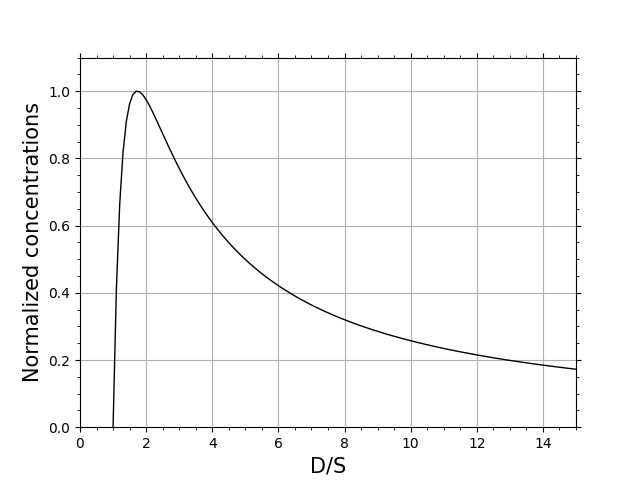

In [4]:
# plot
ifig=1; plt.figure(ifig)

symbol = ['k-','b-','r--','m-','g-']*5



plt.plot(grain_d,test/np.max(test),symbol[0],lw=1.)



plt.xlabel('D/S',fontsize=15); plt.ylabel('Normalized concentrations',fontsize=15)

mm = MultipleLocator(0.05)
plt.gca().yaxis.set_minor_locator(mm)
ml = MultipleLocator(0.5)
plt.gca().xaxis.set_minor_locator(ml)
mt = MultipleLocator(2.)
plt.gca().xaxis.set_major_locator(mt)

plt.grid()
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.xlim(0,15) ; plt.ylim(0.,1.1)
plt.savefig('norm_concentration_figure2_v03.pdf')
plt.show()



# Multiple Grain Model (for a distribution of D and S)

In [5]:
# grain distributions
d_m   = 1.  # median grain size in micrometer 
sig_d = 0.5 # sigma taken from Verchovsky+ 2004 ApJ

# implantation range distributions
s_m   = 1.   # median implantation range (micrometer) 
sig_s = 0.3 # sigma of S (example taken from Verchovsky+ 2004 ApJ)


f_d = grain_size_distribution(sig_d, grain_d, d_m)

# notice that I am using grain_d for convenience instead of s_m, but we do not have to in general
e_s = implantation_range_distribution(sig_s, grain_d, s_m)


In [6]:
# test cases, over a distribution of d_m and for different average implantation ranges s_m
s_m_test1 = s_m * 1.
test1 = [concentration_integrated(fluence, sig_d,grain_d, z ,sig_s, s, s_m_test1, step) for z in grain_d]
s_m_test2 = s_m * 2.
test2 = [concentration_integrated(fluence, sig_d,grain_d, z ,sig_s, s, s_m_test2, step) for z in grain_d]
s_m_test3 = s_m * 5.
test3 = [concentration_integrated(fluence, sig_d,grain_d, z ,sig_s, s, s_m_test3, step) for z in grain_d]

<IPython.core.display.Javascript object>


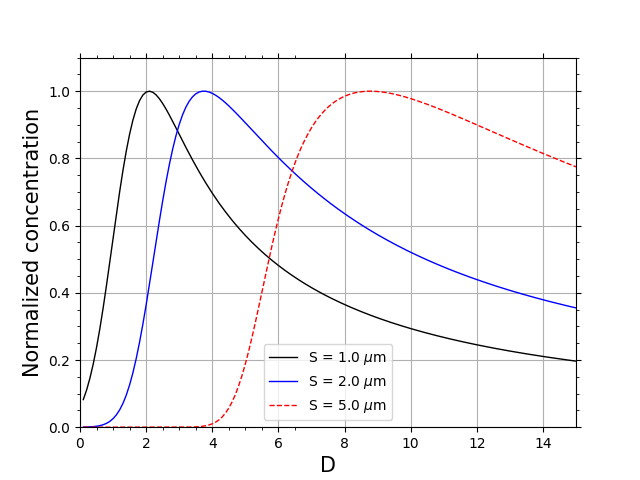

In [7]:
# plot with concentration profiles from different implanation ranges S for different grain distributions
ifig=3; plt.figure(ifig)



#plt.plot(ratio_grain_d_s_grid[:,10],test[:,10]/np.max(test[:,10]),symbol[0],lw=1.)
plt.plot(grain_d, test1/np.max(test1),symbol[0],lw=1.,label='S = '+str(s_m_test1)+' $\mu$m')
plt.plot(grain_d, test2/np.max(test2),symbol[1],lw=1.,label='S = '+str(s_m_test2)+' $\mu$m')
plt.plot(grain_d, test3/np.max(test3),symbol[2],lw=1.,label='S = '+str(s_m_test3)+' $\mu$m')



plt.xlabel('D',fontsize=15); plt.ylabel('Normalized concentration',fontsize=15)

plt.gca().xaxis.set_major_locator(ml)
plt.gca().xaxis.set_minor_locator(mm)

mm = MultipleLocator(0.05)
plt.gca().yaxis.set_minor_locator(mm)
ml = MultipleLocator(0.5)
plt.gca().xaxis.set_minor_locator(ml)
mt = MultipleLocator(2.)
plt.gca().xaxis.set_major_locator(mt)

plt.legend()

plt.grid()
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.xlim(0,15) ; plt.ylim(0.,1.1)
plt.savefig('norm_concentration_mgm_v03.pdf')
plt.show()



# Define grain distribution KJ and load data from Lewis+1994, GeCoA 58

In [8]:
# Lewis+1994, GeCoA 58, 471 Table 1: KJA, KJB, ... , KJH]
kj_m   = [0.38, 0.49, 0.67, 0.81, 1.14, 1.86, 3.02, 4.57] # mean average (micrometers) 
# for the error, I take the largest 80% in both direction (we use normal distribution, but those are 
# not symmetric in L94..). This is somewhere in between 80% and 90% given in the table. 
kj_sig = [0.21, 0.15, 0.27, 0.31, 0.37, 0.68, 1.09, 0.94] # error



# Example database: S distributions for KJ groups over a realistic range of S and S errors (e.g.,Verchovsky+ 2004) 

While the implantation range S depends on the grain size and the model adopted to calculate it, the energy corresponding to a given implantation range will depends on the type of dust and on the ion implanted. For instance, we refer to Verchovsky+ 2004 ApJ for the correspondent energies in the case of some of Kr and Xe isotopes when they are implanted in SiC grains. 

The equivalent energy therefore needs to be calculated for the specific case of interest afterwards, where the type of dust and ion is specified. Different tools can be used for the conversion, e.g., TRIM MC simulations. Verchovsky+ 2003 PASA and Verchovsky+ 2004 ApJ for instance use the TRIM model by Ziegler 2003 (Particle Interactions With Matter, http://www.srim.org) 

# file including S range distributions for KJ groups

The S range considered is based on Verchovsky+ 2004 ApJ , we adopt as typical S error 30 per cent over all the S range. 

In [9]:
s_m_unit = 0.2 # step for S 
s_m_test = np.array([float(i)*s_m_unit + s_m_unit for i in range(30)])   # distribution of average S
sig_test = np.array([sig_s * s_m_test[i] for i in range(len(s_m_test))]) # and their sigma (30 per cent)  


s_output = []
for i in range(len(s_m_test)):
    dum = [concentration_integrated(fluence, kj_sig[z],grain_d, kj_m[z] ,sig_test[i], s, s_m_test[i], step) \
         for z in range(len(kj_m))]
    s_output.append(dum)

output_array = np.transpose(np.array(s_output))    


In [10]:
output_file = 'concentration_vs_implantation_ranges.txt' # output file name
# open file and write data
file_ = open(output_file, 'w')
# headers
file_.write('# concentrations for different S and grain sizes (from '+\
            str(kj_m[0])+' to '+str(kj_m[-1])+ ' micrometers) \n')
file_.write('# S      '); [file_.write(str(kj_m[i])+'       ') for i in range(len(kj_m))]; file_.write('\n')
# writing data
for i in range(len(s_m_test)):
    file_.write(str("%.3f" % s_m_test[i])+'  ')
    for j in range(len(kj_m)):
        file_.write(str("%.3e" % s_output[i][j])+'  ')
    file_.write('\n')
file_.close()

# First Xe data is loaded and abundances for the G and N componente are built for the analysis

In [11]:
file_name_      = 'xe_lewis.txt'
element_to_read = 'xe'

isotopes_xe, kj_xe, kj_xe_array, kj_xe_transp_xe130, factor_conc_xe = \
read_lewis94_data(file_name_, element_to_read) 

In [12]:
# reference isotopic ratio (El(specie_reference)/El(denominator))
specie_reference     = 'xe 136'
ind_ = isotopes_xe.index(specie_reference)
reference_divided_to = 'xe 130'
ind_d = isotopes_xe.index(reference_divided_to)


xe136_gallino_g = 0.0071 # Xe136/Xe130 derived in Lewis+1994 from Gallino+1990 + unpublished data    
xe136_l94_n     = 1.305 #2.5 #1.305  # Xe136/Xe130 derived from fitting around by Lewis+1994

# getting the S and the N component, slopes a and coefficients b from the fitting
# ratio = a * reference_ratio + b
kj_xe_g, kj_xe_g_conc, kj_xe_n, kj_xe_n_conc, slope_derived_arr, coeff_offset_arr = \
    get_g_and_n_components(kj_xe_transp_xe130, xe136_gallino_g, xe136_l94_n, ind_, ind_d, factor_conc_xe)


# getting the transposed arrays, since this is going to be useful for plotting
kj_xe_g_conc_arr = np.array(kj_xe_g_conc); kj_xe_g_conc_arr_transp = np.transpose(kj_xe_g_conc_arr)
kj_xe_n_conc_arr = np.array(kj_xe_n_conc); kj_xe_n_conc_arr_transp = np.transpose(kj_xe_n_conc_arr)


# fake x to plot regression line
line_x = np.linspace(min(kj_xe_transp_xe130[ind_]), max(kj_xe_transp_xe130[ind_]), 200)

In [13]:
## print kj G and N per KJ group for debugging
#for i in range(len(kj_xe_g)):
#    print(isotopes_xe[i])
#    print('G=', ["%.3e" % (kj_xe_g_conc[i][j]/np.max(np.array(kj_xe_g_conc[i]))) for j in range(len(kj_xe))])
#    print('N=', ["%.3e" % (kj_xe_n_conc[i][j]/np.max(np.array(kj_xe_n_conc[i]))) for j in range(len(kj_xe))])
#    


<IPython.core.display.Javascript object>


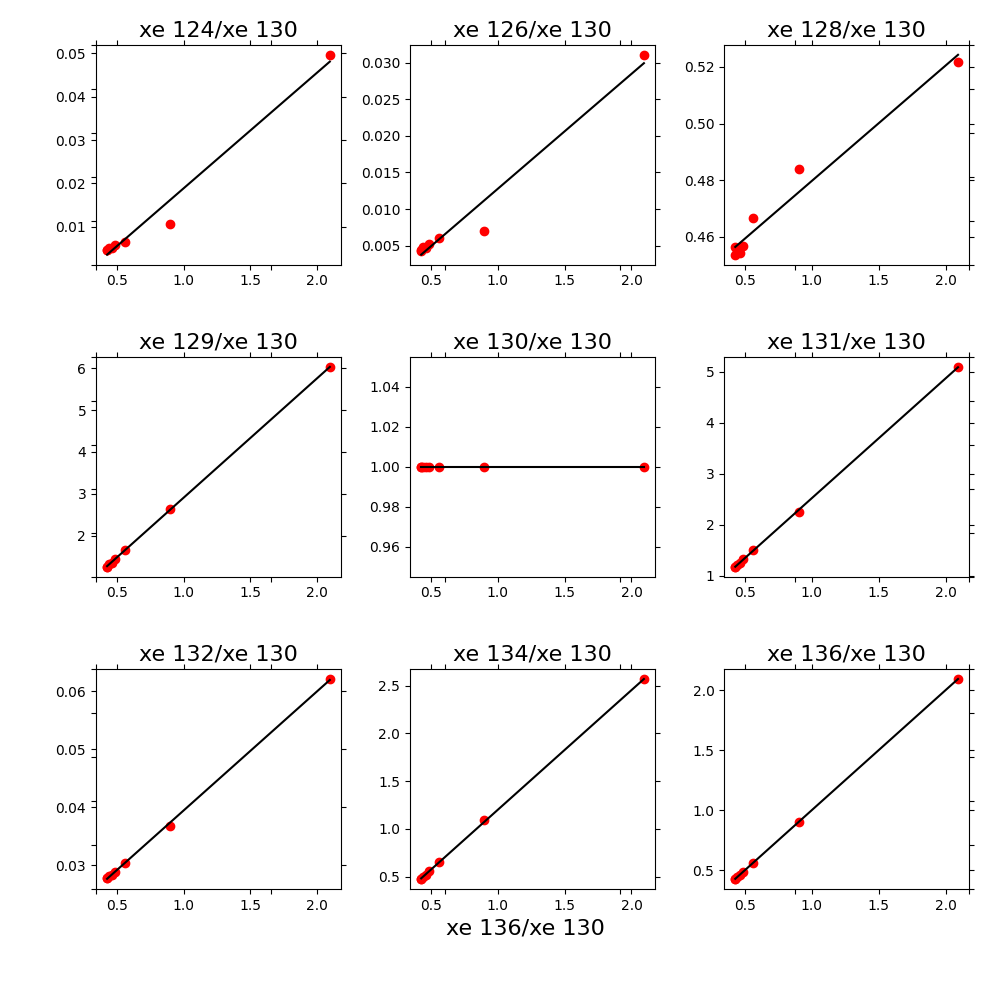

In [14]:
# plot the slopes for the isotopes available
fig, big_axes = plt.subplots( figsize=(10.0, 10.0) , nrows=3, ncols=1, sharey=True) 

for row, big_ax in enumerate(big_axes, start=1):
    if row == 3:
        big_ax.set_xlabel(isotopes_xe[ind_]+'/'+isotopes_xe[ind_d]+" %s \n" % '', fontsize=16)
    # Turn off axis lines and ticks of the big subplot 
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False


for i in range(1,len(isotopes_xe)+1):
    ax = fig.add_subplot(3,3,i)
    ax.set_title(isotopes_xe[i-1]+'/'+isotopes_xe[ind_d], fontsize=16)
    #
    ax.plot(kj_xe_transp_xe130[ind_],kj_xe_transp_xe130[i-1], 'ro')
    ax.plot(line_x, slope_derived_arr[i-1] * line_x + coeff_offset_arr[i-1], color='k')
    
    ax.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)


fig.set_facecolor('w')
plt.tight_layout()
plt.show()

In [15]:
# test with Sm = 0.4 (e.g., Ne22-N) and Sm = 0.9 (e.g., Kr86-G) - V04 ApJ
s_m_test1 = 0.1; sig_test1 =sig_s * s_m_test1
test1 = [concentration_integrated(fluence, kj_sig[z],grain_d, kj_m[z] ,sig_test1, s, s_m_test1, step) \
         for z in range(len(kj_m))]
s_m_test2 = 0.4; sig_test2 =sig_s * s_m_test2
test2 = [concentration_integrated(fluence, kj_sig[z],grain_d, kj_m[z] ,sig_test2, s, s_m_test2, step) \
         for z in range(len(kj_m))]
s_m_test3 = 0.9; sig_test3 =sig_s* s_m_test3
test3 = [concentration_integrated(fluence, kj_sig[z],grain_d, kj_m[z] ,sig_test3, s, s_m_test3, step) \
         for z in range(len(kj_m))]
s_m_test4 = 0.1; sig_test4 =sig_s * s_m_test4
test4 = [concentration_integrated(fluence, kj_sig[z],grain_d, kj_m[z] ,sig_test4, s, s_m_test4, step) \
         for z in range(len(kj_m))]


<IPython.core.display.Javascript object>


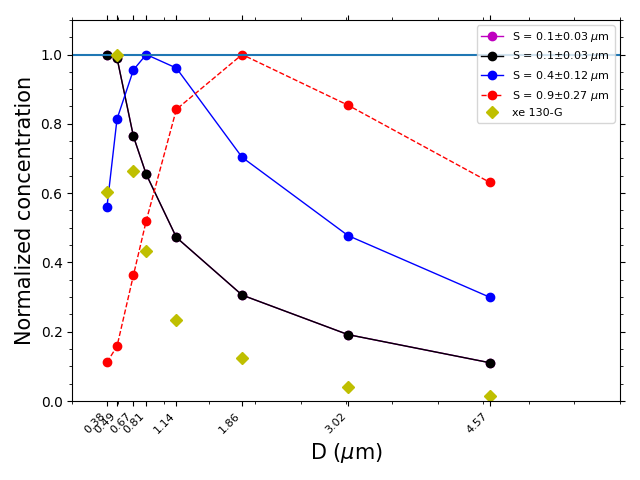

In [16]:
# plot of Xe cold implantation signature vs implantation at different S (or with different energies)
ifig=40; plt.figure(ifig)



plt.plot(kj_m, test4/np.max(test4),symbol[3]+'o',lw=1.,\
         label='S = '+str(s_m_test4)+'$\pm$'+str("%.2f" % sig_test4)+' $\mu$m')
plt.plot(kj_m, test1/np.max(test1),symbol[0]+'o',lw=1.,\
         label='S = '+str(s_m_test1)+'$\pm$'+str("%.2f" % sig_test1)+' $\mu$m')
plt.plot(kj_m, test2/np.max(test2),symbol[1]+'o',lw=1.,\
         label='S = '+str(s_m_test2)+'$\pm$'+str("%.2f" % sig_test2)+' $\mu$m')
plt.plot(kj_m, test3/np.max(test3),symbol[2]+'o',lw=1.,\
         label='S = '+str(s_m_test3)+'$\pm$'+str("%.2f" % sig_test3)+' $\mu$m')


plt.axhline(y=1)
# choose isotope to check for G and N component.
specie_plot = 'xe 130'
ind_ = isotopes_xe.index(specie_plot)

# xe130-G
plt.plot(kj_m, kj_xe_g_conc_arr[ind_]/np.max(kj_xe_g_conc_arr[ind_]),'yD',label=str(isotopes_xe[ind_])+'-G')
# xe130-N
#plt.plot(kj_m, kj_xe_n_conc_arr[4]/np.max(kj_xe_n_conc_arr[4]),'mD',label=str(isotopes_xe[ind_])+'-N')


plt.xlabel('D ($\mu$m)',fontsize=15); plt.ylabel('Normalized concentration',fontsize=15)

plt.gca().xaxis.set_major_locator(ml)
plt.gca().xaxis.set_minor_locator(mm)

mm = MultipleLocator(0.05)
plt.gca().yaxis.set_minor_locator(mm)
ml = MultipleLocator(0.5)
plt.gca().xaxis.set_minor_locator(ml)
mt = MultipleLocator(2.)
plt.gca().xaxis.set_major_locator(mt)

plt.legend(loc='upper right',fontsize=8)

plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

extraticks = kj_m
plt.xticks(list(plt.xticks()[0]) + extraticks,rotation=45, ha="right",fontsize=8)
plt.xticks(extraticks,rotation=45, ha="right",fontsize=8)

plt.xlim(0,6) ; plt.ylim(0.,1.1)
plt.tight_layout()
plt.savefig('preliminary_components_xe.pdf')
plt.show()



# Kr data is loaded and abundances for the G and N componente are built for the analysis

In [17]:
file_name_      = 'kr_lewis.txt'
element_to_read = 'kr'

isotopes_kr, kj_kr, kj_kr_array, kj_kr_transp, factor_conc_kr = \
read_lewis94_data(file_name_, element_to_read) 

In [18]:
# reference isotopic ratio (El(specie_reference)/El(denominator))
specie_reference     = 'kr 84'
ind_ = isotopes_kr.index(specie_reference)
reference_divided_to = 'kr 82'
ind_d = isotopes_kr.index(reference_divided_to)


kr84_l94_s      = 2.87 #2.40 , derived in Lewis+1994 ; 2.87 , derived in Ott+1988   
kr84_l94_n     = 4.928  # derived from fitting around by Lewis+1994

# getting the S and the N component, slopes a and coefficients b from the fitting
# ratio = a * reference_ratio + b
kj_kr_s, kj_kr_s_conc, kj_kr_n, kj_kr_n_conc, slope_derived_arr, coeff_offset_arr = \
    get_g_and_n_components(kj_kr_transp, kr84_l94_s, kr84_l94_n, ind_, ind_d, factor_conc_kr)


# getting the transposed arrays, since this is going to be useful for plotting
kj_kr_s_conc_arr = np.array(kj_kr_s_conc); kj_kr_s_conc_arr_transp = np.transpose(kj_kr_s_conc_arr)
kj_kr_n_conc_arr = np.array(kj_kr_n_conc); kj_kr_n_conc_arr_transp = np.transpose(kj_kr_n_conc_arr)


# fake x to plot regression line
line_x_kr = np.linspace(min(kj_kr_transp[ind_]), max(kj_kr_transp[ind_]), 200)

In [19]:
## print kj G and N per KJ group for debugging
#for i in range(len(kj_kr_s)):
#    print(isotopes_kr[i])
#    print('S=', ["%.3e" % (kj_kr_s_conc[i][j]/np.max(np.array(kj_kr_s_conc[i]))) for j in range(len(kj_kr))])
#    print('N=', ["%.3e" % (kj_kr_n_conc[i][j]/np.max(np.array(kj_kr_n_conc[i]))) for j in range(len(kj_kr))])
#    


<IPython.core.display.Javascript object>


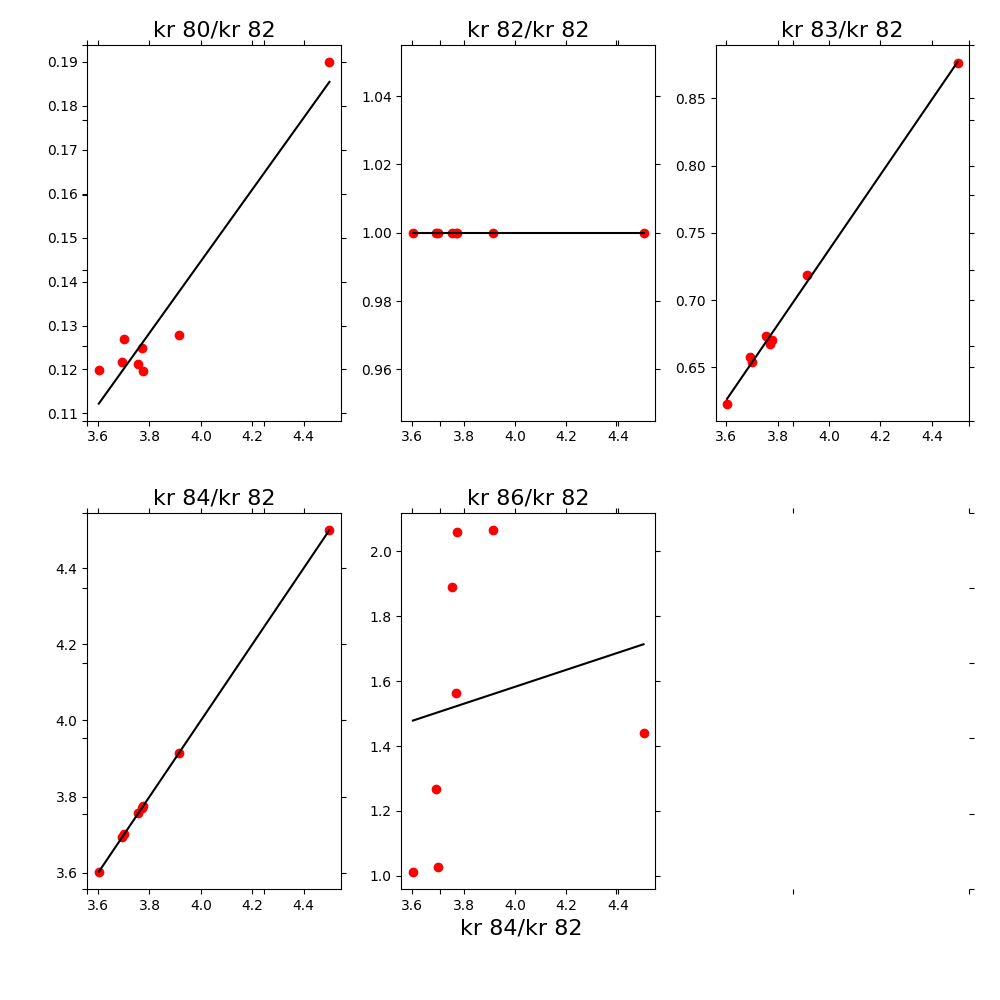

In [20]:
# plot the slopes for the isotopes available
fig, big_axes = plt.subplots( figsize=(10.0, 10.0) , nrows=2, ncols=1, sharey=True) 

for row, big_ax in enumerate(big_axes, start=1):
    if row == 2:
        big_ax.set_xlabel(isotopes_kr[ind_]+'/'+isotopes_kr[ind_d]+" %s \n" % '', fontsize=16)
    # Turn off axis lines and ticks of the big subplot 
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False


for i in range(1,len(isotopes_kr)+1):
    ax = fig.add_subplot(2,3,i)
    ax.set_title(isotopes_kr[i-1]+'/'+isotopes_kr[ind_d], fontsize=16)
    #
    ax.plot(kj_kr_transp[ind_],kj_kr_transp[i-1], 'ro')
    ax.plot(line_x_kr, slope_derived_arr[i-1] * line_x_kr + coeff_offset_arr[i-1], color='k')
    
    ax.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)


fig.set_facecolor('w')
plt.tight_layout()
plt.show()

In [21]:
# You may have to skip some bad group. For Kr, KJH has large errors and it was not used by L94
kj_m_plot = kj_m[:len(kj_kr)] 


# test with Sm = 0.4 (e.g., Ne22-N) and Sm = 0.9 (e.g., Kr86-G) - V04
s_m_test1 = 0.1; sig_test1 = 2*sig_s * s_m_test1
test1 = [concentration_integrated(fluence, kj_sig[z],grain_d, kj_m[z] ,sig_test1, s, s_m_test1, step) \
         for z in range(len(kj_m_plot))]
s_m_test2 = 0.4; sig_test2 = 2*sig_s * s_m_test2
test2 = [concentration_integrated(fluence, kj_sig[z],grain_d, kj_m[z] ,sig_test2, s, s_m_test2, step) \
         for z in range(len(kj_m_plot))]
s_m_test3 = 0.9; sig_test3 = 2*sig_s * s_m_test3
test3 = [concentration_integrated(fluence, kj_sig[z],grain_d, kj_m[z] ,sig_test3, s, s_m_test3, step) \
         for z in range(len(kj_m_plot))]
s_m_test4 = 0.1; sig_test4 = 2*sig_s * s_m_test4
test4 = [concentration_integrated(fluence, kj_sig[z],grain_d, kj_m[z] ,sig_test4, s, s_m_test4, step) \
         for z in range(len(kj_m_plot))]



<IPython.core.display.Javascript object>


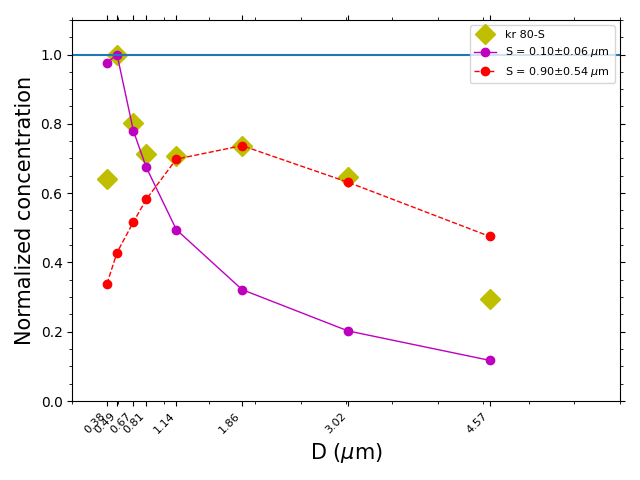

In [22]:
# 2 component plot
ifig=60; plt.figure(ifig)


specie_plot = 'kr 80'
ind_ = isotopes_kr.index(specie_plot)

ynorm_to_plot = kj_kr_s_conc_arr[ind_]/np.max(kj_kr_s_conc_arr[ind_])

# kr86-S
plt.plot(kj_m, ynorm_to_plot,'yD',ms=10,label=str(isotopes_kr[ind_])+'-S')
# Kr86-N
#plt.plot(kj_m, kj_kr_n_conc_arr[-1]/np.max(kj_kr_n_conc_arr[-1]),'mD',label='Kr86-N')


plt.plot(kj_m, test4/np.max(test4),symbol[3]+'o',lw=1.,\
         label='S = '+str("%.2f" % s_m_test4)+'$\pm$'+str("%.2f" % sig_test4)+' $\mu$m')


plt.plot(kj_m, test3/np.max(test3)*ynorm_to_plot[-3],symbol[2]+'o',lw=1.,\
         label='S = '+str("%.2f" % s_m_test3)+'$\pm$'+str("%.2f" % sig_test3)+' $\mu$m')

plt.axhline(y=1)


plt.xlabel('D ($\mu$m)',fontsize=15); plt.ylabel('Normalized concentration',fontsize=15)

plt.gca().xaxis.set_major_locator(ml)
plt.gca().xaxis.set_minor_locator(mm)

mm = MultipleLocator(0.05)
plt.gca().yaxis.set_minor_locator(mm)
ml = MultipleLocator(0.5)
plt.gca().xaxis.set_minor_locator(ml)
mt = MultipleLocator(2.)
plt.gca().xaxis.set_major_locator(mt)

plt.legend(loc='upper right',fontsize=8)

plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

extraticks = kj_m
plt.xticks(list(plt.xticks()[0]) + extraticks,rotation=45, ha="right",fontsize=8)
plt.xticks(extraticks,rotation=45, ha="right",fontsize=8)

plt.xlim(0,6) ; plt.ylim(0.,1.1)
plt.tight_layout()
plt.savefig('preliminary_dual_components_kr.pdf')
plt.show()

